# LSTM TRAINING

In [1]:
import sys
sys.path.insert(0, '..')  
import pandas as pd
import numpy as np
import random
from dataset import label_detection_training, label_detection_validation
from models import Lstm, Gru, Transformer
import matplotlib.pyplot as plt

In [ ]:
results = pd.DataFrame(columns=['lstm_units', 'dropout_rate', 'epoch', 'batch', 'learning_rate', 'loss', 'loss_max', 'accuracy', 'accuracy_max', 'val_loss', 'val_loss_max', 'val_accuracy', 'val_accuracy_max'])

hyperparameters = {
    'lstm_units': [32, 64, 128],
    'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'epoch': [10, 15, 20, 25],
    'batch_size': [16, 32, 64, 128],
    'learning_rate': [0.0001, 0.001, 0.01]
}


n_iter = 10

for n in range(n_iter):
    
    lstm_params = {param: random.choice(values) for param, values in hyperparameters.items()}
    print(lstm_params)

 
    lstm = Lstm(**lstm_params, num_classes=11)

    lstm.train(label_detection_training, label_detection_validation)
    results = np.concatenate((results, pd.DataFrame([[lstm_params['lstm_units'], lstm_params['dropout_rate'], lstm_params['epoch'], lstm_params['batch_size'], lstm_params['learning_rate'], lstm.history.history['loss'][-1], lstm.history.history['loss'], lstm.history.history['accuracy'][-1], lstm.history.history['accuracy'], lstm.history.history['val_loss'][-1], lstm.history.history['val_loss'], lstm.history.history['val_accuracy'][-1], lstm.history.history['val_accuracy']]], 
                                                                        columns=['gru_units', 'dropout_rate', 'epoch', 'batch', 'learning_rate', 'loss', 'loss_max', 'accuracy', 'accuracy_max', 'val_loss', 'val_loss_max', 'val_accuracy', 'val_accuracy_max'])), axis=0)

    



In [ ]:
lstm_params = {'lstm_units': 32, 'dropout_rate': 0.1, 'epoch': 20, 'batch_size': 64, 'learning_rate': 0.001}
lstm = Lstm(**lstm_params, num_classes=11, model_path='..\\models\\best_lstm.h5')
lstm.train(label_detection_training, label_detection_validation)

# Best LSTM result

## Loss

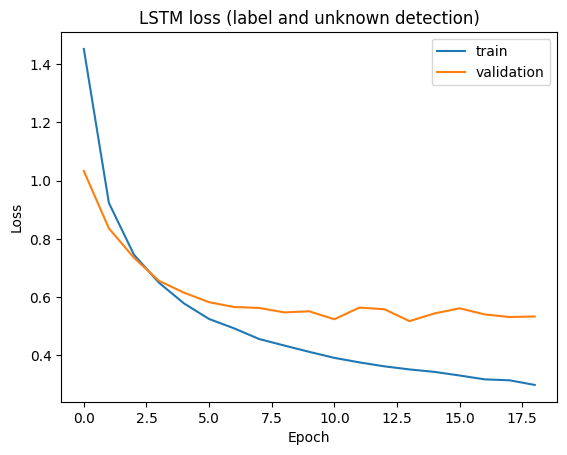

In [11]:
plt.plot(lstm.history.history['loss'], label='train')
plt.plot(lstm.history.history['val_loss'], label='validation')
plt.legend()
plt.title('LSTM loss (label and unknown detection)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

## Accuracy

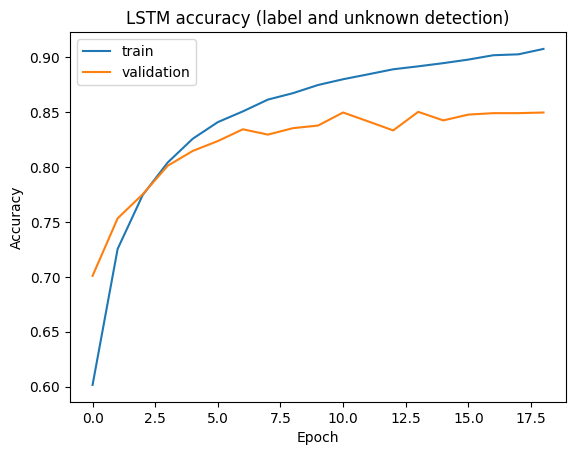

In [10]:
plt.plot(lstm.history.history['accuracy'], label='train')
plt.plot(lstm.history.history['val_accuracy'], label='validation')
plt.legend()
plt.title('LSTM accuracy (label and unknown detection)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()